In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
# from datetime import datetime

In [2]:
plate_path = "plates.csv"
timepoint_path = "timepoints.csv"
plate_df = pd.read_csv(plate_path)
timepoint_df = pd.read_csv(timepoint_path)

In [3]:
# Redefine the timepoint to a datetime object
plate_df["Timepoint"] = pd.to_datetime(plate_df["Timepoint"])
timepoint_df["Timepoint"] = pd.to_datetime(timepoint_df["Timepoint"])

In [4]:
# Create plate class for keeping track of each plate
class Plate:
    def __init__(self, name, dt):
        self.name = name
        self.dt = dt
    def timepoint(self, tp):
        return tp-self.dt

In [5]:
plate_ar = np.empty(len(plate_df), dtype=Plate)
for pix in range(len(plate_df)):
    plate = plate_df.iloc[pix]
    plate_ar[pix] = Plate(plate["plate_name"], plate["Timepoint"])

In [6]:
# Create a timepoint class that keeps track of which plate was taken
class Timepoint:
    def __init__(self, name, dt, plate):
        self.name = name
        self.dt = dt
        self.plate = plate
    def recorded_timepoint(self):
        tp = self.plate.timepoint(self.dt)
        return tp.days*24 + tp.seconds/3600

In [7]:
timepoint_ar = np.empty(len(timepoint_df), dtype=Timepoint)
for tix in range(len(timepoint_df)):
    tp = timepoint_df.iloc[tix]
    # Find the idx of the plate from the plate_id
    plate_name = plate_df[plate_df["plate_id"] == tp["plate_id"]]["plate_name"].values[0]
    for plate in plate_ar:
        if plate.name == plate_name:
            timepoint_ar[tix] = Timepoint(tp["Timepoint_name"], tp["Timepoint"], plate)
            break

In [8]:
recorded_timepoints_ar = np.zeros_like(timepoint_ar, dtype=np.double)
for rix in range(len(recorded_timepoints_ar)):
    recorded_timepoints_ar[rix] = timepoint_ar[rix].recorded_timepoint()

<IPython.core.display.Javascript object>


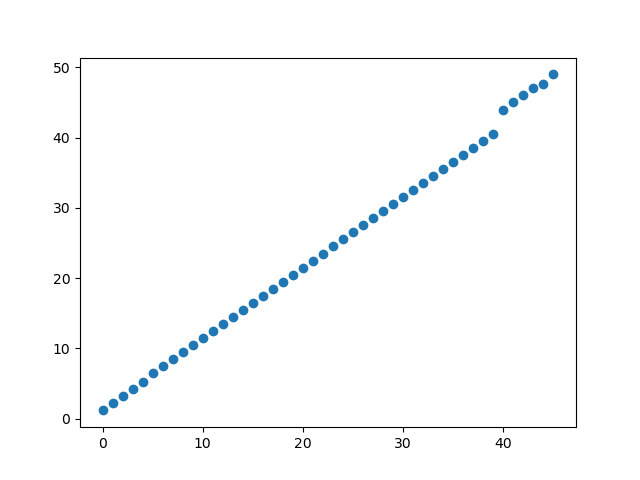

In [13]:
fig,ax = plt.subplots()
ax.plot(np.sort(recorded_timepoints_ar), 'o')

In [12]:
np.diff(np.sort(recorded_timepoints_ar))

array([1.        , 1.        , 1.        , 1.        , 1.33333333,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 3.5       ,
       1.        , 1.        , 1.        , 0.66666667, 1.33333333])